## Handling Missing Value - Complete Case Analysis [ CCA ]
    Handling missing values by Complete Case Analysis ( CCA ), also known as listwise deletion, is a method where you simply discard any data point (row) that has one or more missing values.
    
    - Missing Completely At Random ( MCAR ): The most critical requirement is that the data must be Missing Completely At Random (MCAR). This means the missingness is not related to the value of the variable itself or any other variable in the dataset.
     
    - Small Amount of Missing Data: The proportion of missing data should be very small ( typically less than 5% ). If you have a large amount of missing data, CCA can severely reduce your sample size.

    - Advantages
      - Simple, No imputation bias
      - Keeps original data distribution

    - Disadvantages
      - Loss of data
      - Can introduce bias if missingness is not random
      - Not suitable for small datasets

### Import Libraries

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset 

In [15]:
data = pd.read_csv("data_science_job.csv")
data.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0


### Percentage Wise Null Value of all Column 

In [18]:
data.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

### The Label of Column are Missing Minimum Of 5% Data in Dataset

In [21]:
cols = [var for var in data.columns if data[var].isnull().mean()<0.05 and data[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

### Check the 'educational_level' column value type

In [34]:
data['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

### Drop the Missing Column data & Colculate Percentage of new data

In [38]:
len(data[cols].dropna())/len(data)

0.8968577095730244

### Shape Difference of new and old Data

In [26]:
new_data  = data[cols].dropna()
data.shape, new_data

((19158, 13),
        city_development_index enrolled_university education_level  experience  \
 0                       0.920       no_enrollment        Graduate        20.0   
 1                       0.776       no_enrollment        Graduate        15.0   
 2                       0.624    Full time course        Graduate         5.0   
 4                       0.767       no_enrollment         Masters        20.0   
 5                       0.764    Part time course        Graduate        11.0   
 ...                       ...                 ...             ...         ...   
 19153                   0.878       no_enrollment        Graduate        14.0   
 19154                   0.920       no_enrollment        Graduate        14.0   
 19155                   0.920       no_enrollment        Graduate        20.0   
 19156                   0.802       no_enrollment     High School         0.0   
 19157                   0.855       no_enrollment  Primary School         2.0   
 


### Visualization 

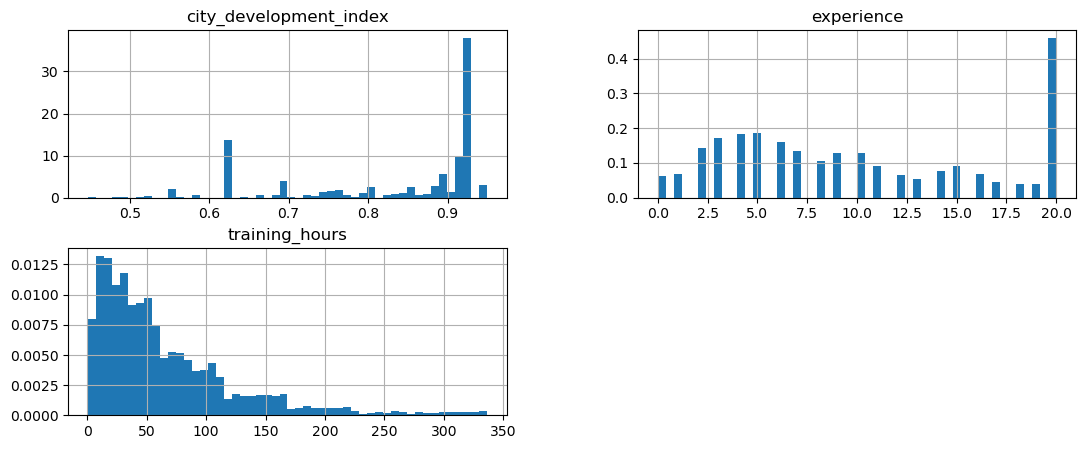

In [29]:
new_data.hist(bins=50,density=True,figsize=(13,5))
plt.show()

### Distribution of training_hours

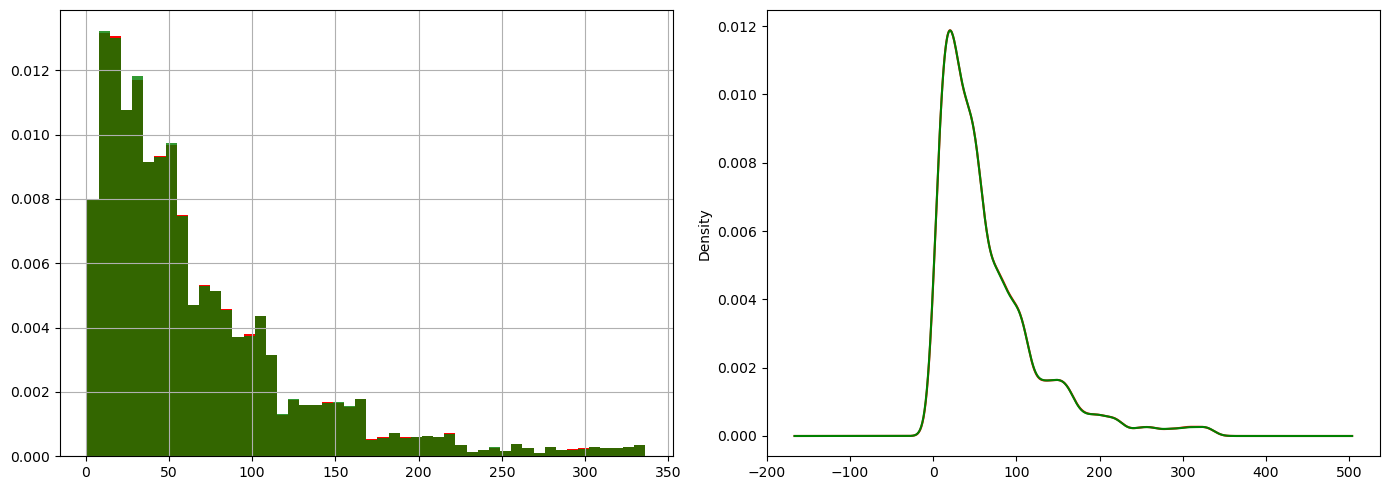

In [41]:
plt.figure(figsize=(14,5))
plt.subplot(121)
data['training_hours'].hist(bins=50,density=True,color="red")
new_data['training_hours'].hist(bins=50,density=True,color="green",alpha=0.8)

plt.subplot(122)
data['training_hours'].plot.density(color="red")
new_data['training_hours'].plot.density(color="green")
plt.tight_layout()
plt.show()

### Check the Variance [ Before Vs After CCA ]

In [46]:
temp = pd.concat([data['enrolled_university'].value_counts()/len(data),
                 new_data['enrolled_university'].value_counts()/len(new_data)],axis=1)

In [48]:
temp.columns=['Original','CCA']
temp

,Original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [50]:
temp = pd.concat([data['education_level'].value_counts()/len(data),
                 new_data['education_level'].value_counts()/len(new_data)],axis=1)

In [52]:
temp.columns=['Original','CCA']
temp

,Original,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
